In [1]:
import pandas as pd 
# !dir 로 현재 경로 확인 후 
file_path = "./ref/청소년정신건강_20250304.csv"
ori = pd.read_csv(file_path)
ori 

,시점,스트레스 인지율,스트레스 인지율.1,스트레스 인지율.2,우울감 경험률,우울감 경험률.1,우울감 경험률.2,자살 생각률,자살 생각률.1,자살 생각률.2
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [2]:
#컬럼명 
new_name = ['시점','스트레스','스트레스남학생','스트레스여학생','우울감경험율','우울남학생','우울여학생','자살생각율','자살남학생','자살여학생']
ori.columns = new_name
ori

,시점,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
0,시점,전체,남학생,여학생,전체,남학생,여학생,전체,남학생,여학생
1,2024,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [3]:
#시점을 없애고, 0번 행도 없앰 
ori = ori.loc[1:,'스트레스':]
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4


In [4]:
#2번 인덱스 행들 생성,100에서 값을 뺀 값 
ori.loc[2] = 100 - ori.loc[1,'스트레스':].astype(float)
#마지막에 응답 칼럼을 생성,그렇다 or 아니다 
ori['응답']=['그렇다','아니다']
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생,응답
1,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4,그렇다
2,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6,아니다


In [5]:
ori = ori.set_index('응답')
ori

,스트레스,스트레스남학생,스트레스여학생,우울감경험율,우울남학생,우울여학생,자살생각율,자살남학생,자살여학생
응답,,,,,,,,,
그렇다,45.3,39.6,51.3,28.2,23.9,32.6,14.2,11.1,17.4
아니다,54.7,60.4,48.7,71.8,76.1,67.4,85.8,88.9,82.6


In [6]:
# OS에 사용가능한 ,설치된 폰트를 나열 
import matplotlib
import matplotlib.pyplot as plt 
from matplotlib import rc 
import matplotlib.font_manager as fm 
fontlist = fm.findSystemFonts(fontpaths=None,fontext='ttf')
fontlist

['C:\\Windows\\Fonts\\SCHLBKI.TTF',
 'C:\\Windows\\Fonts\\simsunb.ttf',
 'C:\\Windows\\Fonts\\PERTILI.TTF',
 'C:\\Windows\\Fonts\\H2PORL.TTF',
 'C:\\Windows\\Fonts\\HANBatangExtB.ttf',
 'C:\\Windows\\Fonts\\comici.ttf',
 'C:\\Windows\\Fonts\\AGENCYR.TTF',
 'C:\\Windows\\Fonts\\ALGER.TTF',
 'C:\\Windows\\Fonts\\DUBAI-REGULAR.TTF',
 'C:\\Windows\\Fonts\\HANDotumB.ttf',
 'C:\\Windows\\Fonts\\msyhbd.ttc',
 'C:\\Windows\\Fonts\\ntailu.ttf',
 'C:\\Windows\\Fonts\\FRADMCN.TTF',
 'C:\\Windows\\Fonts\\COPRGTB.TTF',
 'C:\\Windows\\Fonts\\OCRAEXT.TTF',
 'C:\\Windows\\Fonts\\calibrib.ttf',
 'C:\\Windows\\Fonts\\FREESCPT.TTF',
 'C:\\Windows\\Fonts\\GILI____.TTF',
 'C:\\Windows\\Fonts\\calibril.ttf',
 'C:\\Windows\\Fonts\\MAGNETOB.TTF',
 'C:\\Windows\\Fonts\\HYHWPEQ.TTF',
 'C:\\Windows\\Fonts\\cour.ttf',
 'C:\\Windows\\Fonts\\HanSantteutDotum-Regular.ttf',
 'C:\\Windows\\Fonts\\MATURASC.TTF',
 'C:\\Windows\\Fonts\\Inkfree.ttf',
 'C:\\Windows\\Fonts\\YuGothM.ttc',
 'C:\\Windows\\Fonts\\LCALLIG.TTF',


Text(0.3, 0.3, '한글')

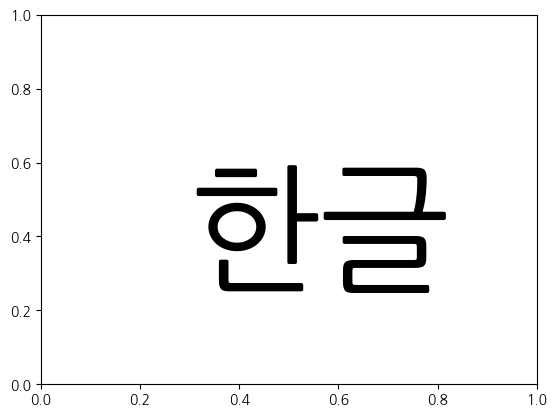

In [7]:
#윈도우용 폰트 경로 설정 
path = "C:\\Windows\\Fonts\\NanumGothicLight.ttf"
font_name = fm.FontProperties(fname= path).get_name()
rc('font',family=font_name)
plt.text(0.3,0.3,'한글',size=100)

<Axes: ylabel='스트레스'>

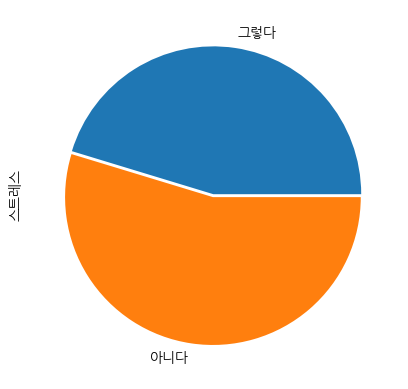

In [8]:
ori['스트레스'].astype(float).plot.pie(explode=[0,0.02])

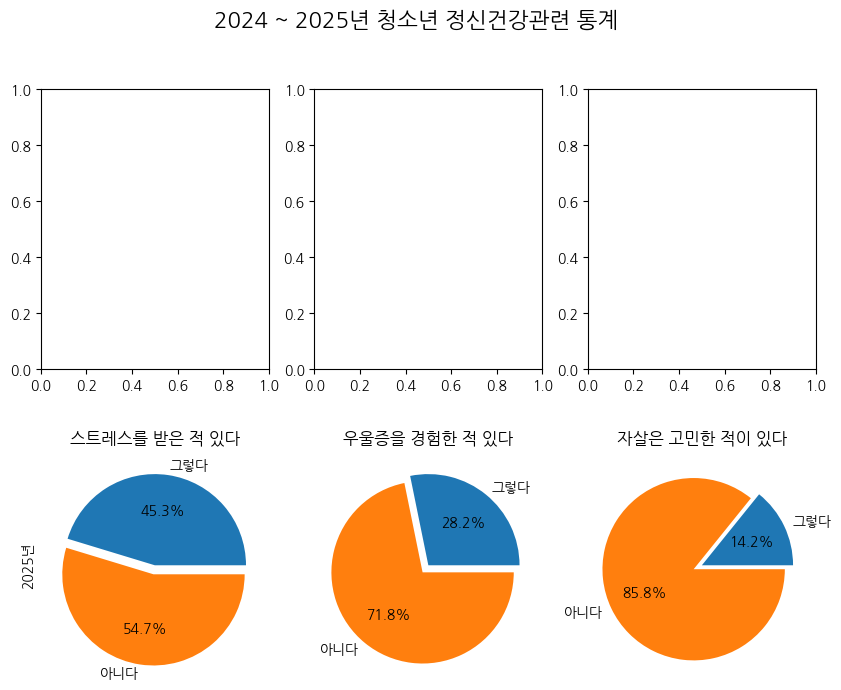

In [9]:
# 필요한 라이브러리 임포트 #그래프 그리기 위한 준비 
import matplotlib.pyplot as plt 

#2x3 크기의 서브플롯(fig,ax) 생성 , 그래프의 크기 10x8 설정 
#fig는 전체 그림 객체 
#ax는 각 서브플롯의 축 객체 
fig, ax = plt.subplots(2,3,figsize=(10,8))

# '스트레스' 데이터를 파이 차트로 시각화 
#autopct는 퍼센트 포맷 
ori['스트레스'].astype(float).plot.pie(explode=[0,0.1], ax=ax[1][0],autopct="%.1f%%")
ax[1][0].set_title('스트레스를 받은 적 있다')
ax[1][0].set_ylabel('2025년')

# '우울감경험율 '데이터를 파이차트로 시각화 
ori['우울감경험율'].astype(float).plot.pie(explode=[0,0.1],ax=ax[1][1],autopct="%.1f%%")
ax[1][1].set_title('우울증을 경험한 적 있다')
ax[1][1].set_ylabel('')

# '자살생각율' 데이터를 파이차트로 시각화 
ori['자살생각율'].astype(float).plot.pie(explode=[0,0.1],ax = ax[1][2],autopct="%.1f%%")
ax[1][2].set_title('자살은 고민한 적이 있다')
ax[1][2].set_ylabel('')

# 6. 그래프의 전체 제목 설정
plt.suptitle('2024 ~ 2025년 청소년 정신건강관련 통계', fontsize=16)

# 7. 그래프를 화면에 출력
plt.show()